In [87]:
import pyreadr

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Discovery

### Load Datasets

In [88]:
datset_name = "main"
cutoff = 0.9

# load discovery results
experiment_name = f"discovery_{datset_name}_cutoff_{0.9}"
discovery = pyreadr.read_r(f'results/{experiment_name}.rdata')["discovery"]
discovery.replace("NaN","0", inplace=True)
discovery.iloc[:,1:] = discovery.iloc[:,1:].astype(float)

# filtering
xmax = 5
#methods = ["CRE (aipw)", "CRE (cf)", "CRE (bcf)", "HCT"]
#discovery = discovery[(discovery.method.isin(methods)) & (discovery.effect_size<=xmax)]
discovery

,method,effect_size,seed,dr_IoU,dr_Precision,dr_Recall,em_IoU,em_Precision,em_Recall
0,CRE (aipw),0.0,1.0,0.0,0.0,0.0,0.100000,0.250000,0.142857
1,CRE (aipw),0.0,2.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,CRE (aipw),0.0,3.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,CRE (aipw),0.0,4.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,CRE (aipw),0.0,5.0,0.0,0.0,0.0,0.111111,0.333333,0.142857
...,...,...,...,...,...,...,...,...,...
45495,CRE (bart),5.0,246.0,1.0,1.0,1.0,1.000000,1.000000,1.000000
45496,CRE (bart),5.0,247.0,0.8,0.8,1.0,1.000000,1.000000,1.000000
45497,CRE (bart),5.0,248.0,1.0,1.0,1.0,1.000000,1.000000,1.000000
45498,CRE (bart),5.0,249.0,1.0,1.0,1.0,1.000000,1.000000,1.000000


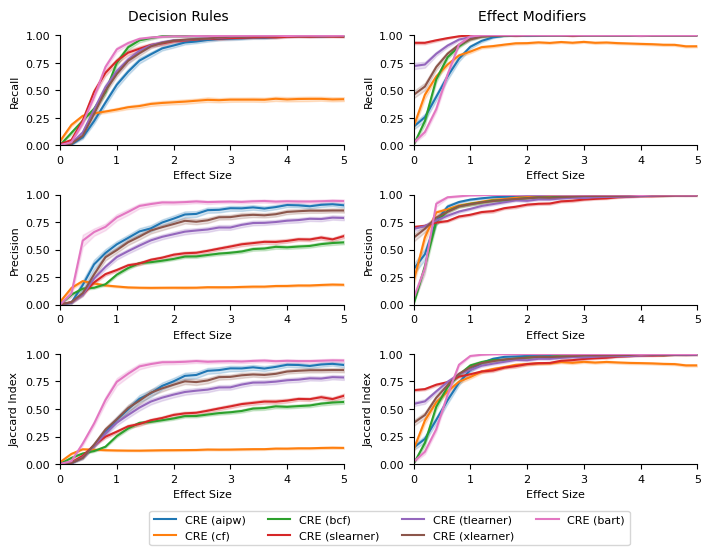

In [89]:
fig = plt.figure(constrained_layout=True, figsize=(7, 5))
#fig.suptitle('Discovery')
subfigs = fig.subfigures(nrows=1, ncols=2)
labelsize = 8

# Causal Decision Rules
subfigs[0].suptitle(f'Decision Rules', size=10)
ax = subfigs[0].subplots(nrows=3, ncols=1)

sns.lineplot(data=discovery, x="effect_size", y="dr_Recall", hue="method", ax=ax[0])
ax[0].set_xlabel('Effect Size', size=labelsize)  
ax[0].set_ylabel('Recall', size=labelsize) 
ax[0].set_ylim((0,1)) 
ax[0].set_xlim((0,xmax))
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].tick_params(axis='both', which='major', labelsize=labelsize)
ax[0].get_legend().remove()

sns.lineplot(data=discovery, x="effect_size", y="dr_Precision", hue="method", ax=ax[1])
ax[1].set_xlabel('Effect Size', size=labelsize)  
ax[1].set_ylabel('Precision', size=labelsize) 
ax[1].set_ylim((0,1)) 
ax[1].set_xlim((0,xmax))
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].tick_params(axis='both', which='major', labelsize=labelsize)
ax[1].get_legend().remove()

sns.lineplot(data=discovery, x="effect_size", y="dr_IoU", hue="method", ax=ax[2])
ax[2].set_xlabel('Effect Size', size=labelsize)  
ax[2].set_ylabel('Jaccard Index', size=labelsize)  
ax[2].set_ylim((0,1))
ax[2].set_xlim((0,xmax))
ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].tick_params(axis='both', which='major', labelsize=labelsize)
ax[2].get_legend().remove()


# Effect Modifiers
subfigs[1].suptitle(f'Effect Modifiers', size=10)
ax = subfigs[1].subplots(nrows=3, ncols=1)

sns.lineplot(data=discovery, x="effect_size", y="em_Recall", hue="method", ax=ax[0])
ax[0].set_xlabel('Effect Size', size=labelsize) 
ax[0].set_ylabel('Recall', size=labelsize) 
ax[0].set_ylim((0,1))
ax[0].set_xlim((0,xmax))
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].tick_params(axis='both', which='major', labelsize=labelsize)
ax[0].get_legend().remove()  

sns.lineplot(data=discovery, x="effect_size", y="em_Precision", hue="method", ax=ax[1])
ax[1].set_xlabel('Effect Size', size=labelsize)  
ax[1].set_ylabel('Precision', size=labelsize)  
ax[1].set_ylim((0,1))
ax[1].set_xlim((0,xmax))
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].tick_params(axis='both', which='major', labelsize=labelsize)
ax[1].get_legend().remove()

sns.lineplot(data=discovery, x="effect_size", y="em_IoU", hue="method", ax=ax[2])
ax[2].set_xlabel('Effect Size', size=labelsize) 
ax[2].set_ylabel('Jaccard Index', size=labelsize)  
ax[2].set_ylim((0,1))
ax[2].set_xlim((0,xmax))
ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].tick_params(axis='both', which='major', labelsize=labelsize)
ax[2].get_legend().remove()

handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', ncol=4, bbox_to_anchor=(0.9, 0), fontsize=labelsize);
plt.savefig(f'results/{experiment_name}.pdf', bbox_inches='tight') 

# Estimation

### Load Dataset

In [90]:
datset_name = "main"
cutoff = 0.9
n_rules = 2

# load estimation results
experiment_name = f"estimation_{datset_name}_cutoff_{cutoff}"
estimation = pyreadr.read_r(f'results/{experiment_name}.rdata')["estimation"]
estimation.iloc[:,1:] = estimation.iloc[:,1:].astype(float)

# standardize
estimation["beta1"] = (estimation["beta1"]+estimation["effect_size"])/estimation["effect_size"]
estimation["beta2"] = (estimation["beta2"]-estimation["effect_size"])/estimation["effect_size"]
if (n_rules==4):
    estimation["beta3"] = (estimation["beta3"]+2*estimation["effect_size"])/estimation["effect_size"]
    estimation["beta4"] = (estimation["beta4"]-2*estimation["effect_size"])/estimation["effect_size"]
else:
    estimation.drop(columns=['beta3', 'beta4'], axis=1, inplace=True)

# filtering
#methods = ["CRE (aipw)", "CRE (cf)", "CRE (bcf)", "CF", "BCF"]#, "AIPW", "HCT"]
#estimation = estimation[estimation.method.isin(methods)]

estimation


,method,effect_size,seed,ite_rmse,ite_bias,cate_bias,ate_bias,beta1,beta2,beta3,beta4
0,CRE (aipw),5.0,1.0,0.111337,0.065733,0.19382,0.065733,-0.033902,0.023855,0.006344,0.006013
1,CRE (aipw),5.0,2.0,0.174618,0.085092,0.219529,0.085092,-0.035017,0.020612,0.001518,-0.066966
2,CRE (aipw),5.0,3.0,0.142418,-0.089486,-0.038106,-0.089486,-0.0154,-0.005719,-0.040038,-0.020043
3,CRE (aipw),5.0,4.0,0.206583,-0.086517,-0.150498,-0.086517,0.014723,-0.083218,0.014923,-0.041697
4,CRE (aipw),5.0,5.0,0.232959,0.06787,0.309,0.06787,-0.067843,-0.02912,0.052176,-0.068967
...,...,...,...,...,...,...,...,...,...,...,...
3495,bart,5.0,246.0,0.985429,-0.03999,-0.189177,-0.03999,NaN,NaN,NaN,NaN
3496,bart,5.0,247.0,0.984969,-0.019562,0.072521,-0.019562,NaN,NaN,NaN,NaN
3497,bart,5.0,248.0,1.007869,-0.006438,-0.00504,-0.006438,NaN,NaN,NaN,NaN
3498,bart,5.0,249.0,0.981568,-0.041901,-0.041854,-0.041901,NaN,NaN,NaN,NaN


### ITE

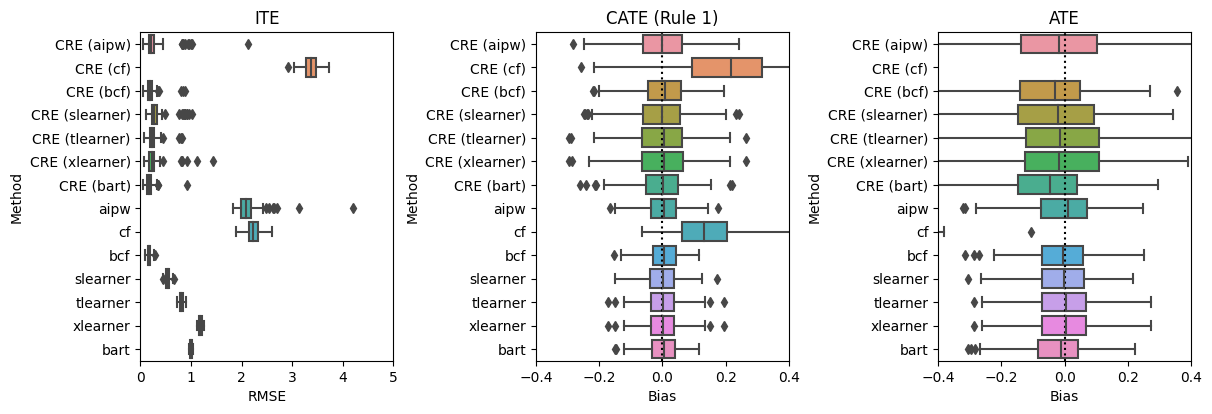

In [91]:
fig, ax = plt.subplots(1,3,figsize=(12, 4), layout='constrained')
#fig.suptitle('Estimation')

sns.boxplot(data=estimation, x="ite_rmse", y="method", ax=ax[0])
ax[0].set_title("ITE")
ax[0].set_xlabel('RMSE')  
ax[0].set_ylabel('Method')
ax[0].set_xlim((0,5))
ax[0].axvline(-5, 0, 5, color="black", linestyle=":"); 

sns.boxplot(data=estimation, x="ite_bias", y="method", ax=ax[1])
ax[1].set_title("CATE (Rule 1)")
ax[1].set_xlabel('Bias')  
ax[1].set_ylabel('Method')
ax[1].set_xlim((-0.4,0.4))
ax[1].axvline(5, 0, 5, color="black", linestyle=":")
ax[1].axvline(0, 0, 5, color="black", linestyle=":");  

sns.boxplot(data=estimation, x="cate_bias", y="method", ax=ax[2])
ax[2].set_title("ATE")
ax[2].set_xlabel('Bias')  
ax[2].set_ylabel('Method')
ax[2].set_xlim((-0.4,0.4))
ax[2].axvline(5, 0, 5, color="black", linestyle=":")
ax[2].axvline(0, 0, 5, color="black", linestyle=":");  

plt.savefig(f'results/{experiment_name}_ITE.pdf', bbox_inches='tight') 

### CATE

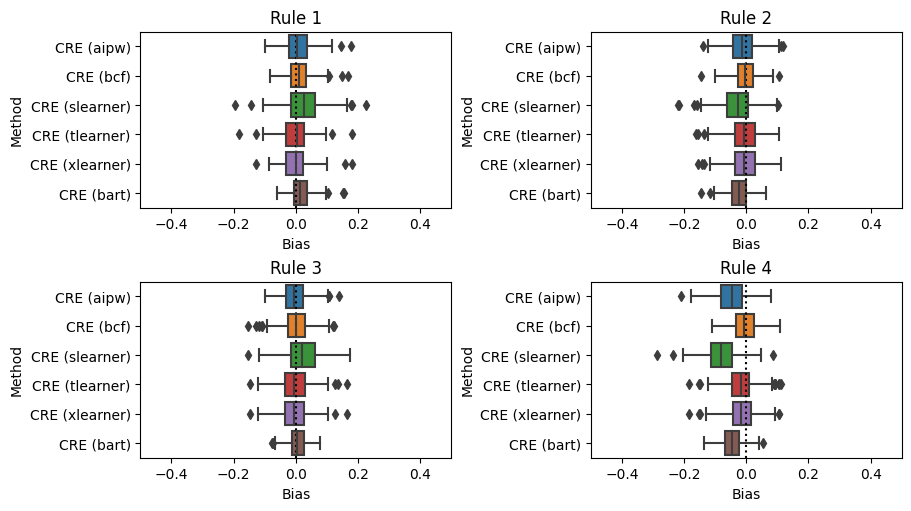

In [92]:
estimation_beta = estimation.dropna()
if (n_rules==2):
    fig, ax = plt.subplots(1,2,figsize=(9, 2.5), layout='constrained')
    #fig.suptitle('Estimation - β (AATE)')

    sns.boxplot(data=estimation_beta, x="beta1", y="method", ax=ax[0])
    ax[0].set_title('Rule 1')
    ax[0].set_xlabel('Bias')  
    ax[0].set_ylabel('Method')
    ax[0].set_xlim((-0.5,0.5))
    ax[0].axvline(0, 0, 5, color="black", linestyle=":"); 

    sns.boxplot(data=estimation_beta, x="beta2", y="method", ax=ax[1])
    ax[1].set_title('Rule 2')
    ax[1].set_xlabel('Bias')  
    ax[1].set_ylabel('Method')
    ax[1].set_xlim((-0.5,0.5))
    ax[1].axvline(0, 0, 5, color="black", linestyle=":"); 

    plt.savefig(f'results/{experiment_name}_beta.pdf') 
elif (n_rules==4):
    fig, ax = plt.subplots(2,2,figsize=(9, 5), layout='constrained')
    #fig.suptitle('Estimation - β (AATE)')

    sns.boxplot(data=estimation_beta, x="beta1", y="method", ax=ax[0,0])
    ax[0,0].set_title('Rule 1')
    ax[0,0].set_xlabel('Bias')  
    ax[0,0].set_ylabel('Method')
    ax[0,0].set_xlim((-0.5,0.5))
    ax[0,0].axvline(0, 0, 5, color="black", linestyle=":"); 

    sns.boxplot(data=estimation_beta, x="beta2", y="method", ax=ax[0,1])
    ax[0,1].set_title('Rule 2')
    ax[0,1].set_xlabel('Bias')  
    ax[0,1].set_ylabel('Method')
    ax[0,1].set_xlim((-0.5,0.5))
    ax[0,1].axvline(0, 0, 5, color="black", linestyle=":"); 

    sns.boxplot(data=estimation_beta, x="beta3", y="method", ax=ax[1,0])
    ax[1,0].set_title('Rule 3')
    ax[1,0].set_xlabel('Bias')  
    ax[1,0].set_ylabel('Method')
    ax[1,0].set_xlim((-0.5,0.5))
    ax[1,0].axvline(0, 0, 5, color="black", linestyle=":"); 

    sns.boxplot(data=estimation_beta, x="beta4", y="method", ax=ax[1,1])
    ax[1,1].set_title('Rule 4')
    ax[1,1].set_xlabel('Bias')  
    ax[1,1].set_ylabel('Method')
    ax[1,1].set_xlim((-0.5,0.5))
    ax[1,1].axvline(0, 0, 5, color="black", linestyle=":"); 

plt.savefig(f'results/{experiment_name}_beta.pdf') 
    

In [93]:
estimation_summary = estimation.drop(columns=['effect_size', 'seed'], axis=1,)
estimation_summary = estimation_summary.groupby("method").agg(["mean","std"])
estimation_summary

ite_rmse            ite_bias           cate_bias            \
                    mean       std      mean       std      mean       std   
method                                                                       
CRE (aipw)      0.250501  0.189715 -0.002939  0.093616 -0.029330  0.203266   
CRE (bart)      0.175744  0.072918 -0.001652  0.080990 -0.056645  0.151697   
CRE (bcf)       0.190075  0.088395  0.006059  0.080371 -0.043010  0.162192   
CRE (cf)        3.373041  0.146974  0.204760  0.178013 -2.060928  0.456803   
CRE (slearner)  0.296732  0.139377 -0.004373  0.090031 -0.041543  0.197454   
CRE (tlearner)  0.234928  0.094304  0.000342  0.094354 -0.013372  0.168569   
CRE (xlearner)  0.235593  0.141561  0.000308  0.094844 -0.016843  0.175832   
aipw            2.113886  0.207651  0.000688  0.056089 -0.004735  0.106992   
bart            0.999367  0.016132  0.001204  0.051661 -0.023832  0.096674   
bcf             0.169807  0.035315  0.004544  0.051901 -0.009481  0.100069   
cf              2.240487  0.142113  0.133053  0.093152 -1.259429  0.334891   
slearner        0.540956  0.039429 -0.000642  0.053240 -0.008237  0.098825   
tlearner        0.807488  0.037083  0.002583  0.056723 -0.001257  0.098730   
xlearner        1.188285  0.029264  0.002583  0.056723 -0.001278  0.098726   

                ate_bias               beta1               beta2            \
                    mean       std      mean       std      mean       std   
method                                                                       
CRE (aipw)     -0.002939  0.093616  0.077538  0.369319 -0.109152  0.470326   
CRE (bart)     -0.001652  0.080990  0.039379  0.218733 -0.048547  0.232715   
CRE (bcf)       0.006059  0.080371  0.059529  0.304816 -0.056386  0.340373   
CRE (cf)        0.204760  0.178013  0.081797  0.577307 -2.338422  0.790487   
CRE (slearner) -0.004373  0.090031  0.136224  0.453927 -0.160132  0.543907   
CRE (tlearner)  0.000342  0.094354  0.039975  0.280449 -0.055150  0.353630   
CRE (xlearner)  0.000308  0.094844  0.041701  0.279221 -0.075039  0.413875   
aipw            0.000688  0.056089       NaN       NaN       NaN       NaN   
bart            0.001204  0.051661       NaN       NaN       NaN       NaN   
bcf             0.004544  0.051901       NaN       NaN       NaN       NaN   
cf              0.133053  0.093152       NaN       NaN       NaN       NaN   
slearner       -0.000642  0.053240       NaN       NaN       NaN       NaN   
tlearner        0.002583  0.056723       NaN       NaN       NaN       NaN   
xlearner        0.002583  0.056723       NaN       NaN       NaN       NaN   

                   beta3               beta4            
                    mean       std      mean       std  
method                                                  
CRE (aipw)      0.154615  0.766943 -0.047871  0.051310  
CRE (bart)      0.053076  0.431171 -0.045546  0.037172  
CRE (bcf)       0.094392  0.612516 -0.005275  0.040514  
CRE (cf)        1.877441  0.705984       NaN       NaN  
CRE (slearner)  0.238646  0.895743 -0.080513  0.054736  
CRE (tlearner)  0.077383  0.562504 -0.017891  0.049613  
CRE (xlearner)  0.106656  0.648368 -0.017416  0.049498  
aipw                 NaN       NaN       NaN       NaN  
bart                 NaN       NaN       NaN       NaN  
bcf                  NaN       NaN       NaN       NaN  
cf                   NaN       NaN       NaN       NaN  
slearner             NaN       NaN       NaN       NaN  
tlearner             NaN       NaN       NaN       NaN  
xlearner             NaN       NaN       NaN       NaN